customer segmentation using K-means clustering

importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


loading the dataset

In [4]:
customer_data = pd.read_csv("/content/drive/MyDrive/self_projects/customer_segmentation/Mall_Customers.csv")
customer_data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
# checking the shape of the dataframe
customer_data.shape

(200, 5)

In [7]:
# checking for other information of the dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for null values within the dataframe
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# since clustering algo will be used, we want to only some features
X = customer_data.iloc[:,[3,4]].values # .values convert the segmented dataframe to numpy array

In [13]:
# printing the resultant numpy array
X # the first column is "Annual Income (k$)" and the second one is "Spending Score (1-100)"

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
# the formula that will be used is WCSS:
# Within Cluster Sum of Squares
# so we will be checking the corresponding WCSS value with respect to the number of clusters

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # appending wcss values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

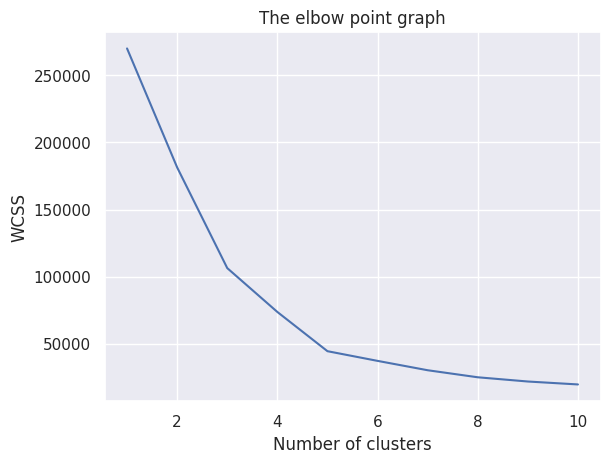

In [16]:
# plot the elbow graph: represents at which point (elbow point), that is at which number of clusters, wcss would be minimum
# means the scattered points belonging to a single cluster, what will be the optimal distance from the centroid of that
# respective cluster
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
# the elbow point is that point after which no such significant changes within the cluster is observed (with respect to WCSS)
# here, there are 2 elbow points (when number_of_clusters=3 and when it is 5)

Optimal number of clusters = 5

training the k-means clustering

In [18]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
y = kmeans.fit_predict(X)
print(y) # we are actually labelling each datapoint,
# since there are 5 clusters so the numbering starts from 0 to 4 inclusive

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


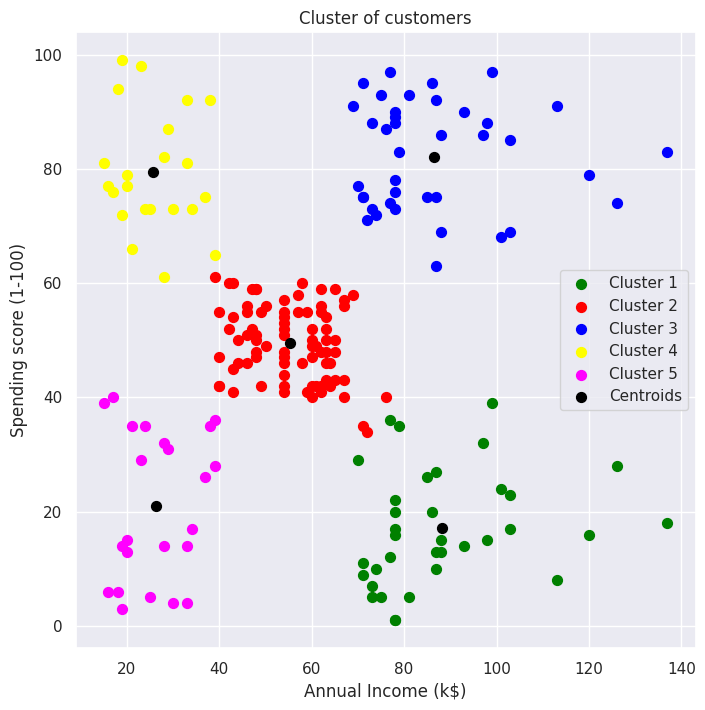

In [21]:
# plotting the clusters along with their centroid

plt.figure(figsize=(8,8))

# plot the clusters
plt.scatter(X[y==0, 0], X[y==0, 1], s = 50, c = "green", label = "Cluster 1") # s means size of the dots
plt.scatter(X[y==1, 0], X[y==1, 1], s = 50, c = "red", label = "Cluster 2")
plt.scatter(X[y==2, 0], X[y==2, 1], s = 50, c = "blue", label = "Cluster 3")
plt.scatter(X[y==3, 0], X[y==3, 1], s = 50, c = "yellow", label = "Cluster 4")
plt.scatter(X[y==4, 0], X[y==4, 1], s = 50, c = "magenta", label = "Cluster 5")
# here X[y==0, 0] means the X-axis and X[y==0, 1] represents the y-axis, corresponds with the column number 0 and 1
# in the row section we select only those which corresponds with the label number
# here both X and y axis or the parameter within the scatter method represents a list


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = "black", label = "Centroids")



plt.legend()
plt.title("Cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending score (1-100)")
plt.show()